In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
df = pd.read_csv('data.csv')

In [3]:
len(df)

150150

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [8]:
len(df['week'].unique())

130

Easypreprocessing is a library used for common ML related preprocessing activities.

In [2]:
prep = EasyPreProcessing('train.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [3]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correction()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correction()</td><td>Display correction heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

# Handling Null Values

In [4]:
prep.categorical.fields

['week']

In [5]:
prep.numerical.fields

['record_ID',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [6]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [7]:
prep.numerical.impute()

Numerical features imputated successfully.


In [8]:
prep.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [9]:
df['key'] = df['week'].astype(str) + '_' + df['store_id'].astype(str)

In [10]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,key
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17/01/11_8091
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17/01/11_8091
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17/01/11_8091
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17/01/11_8091
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17/01/11_8091


Removing columns that are not helpful for time series predictions.

In [11]:
df = df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

Summing units_sold group by key.

In [12]:
df = df.groupby('key').sum()

In [13]:
df

,units_sold
key,
01/01/13_8023,2025
01/01/13_8058,682
01/01/13_8063,535
01/01/13_8091,210
01/01/13_8094,782
...,...
31/10/11_9890,531
31/10/11_9909,551
31/10/11_9954,431


<Axes: xlabel='key'>

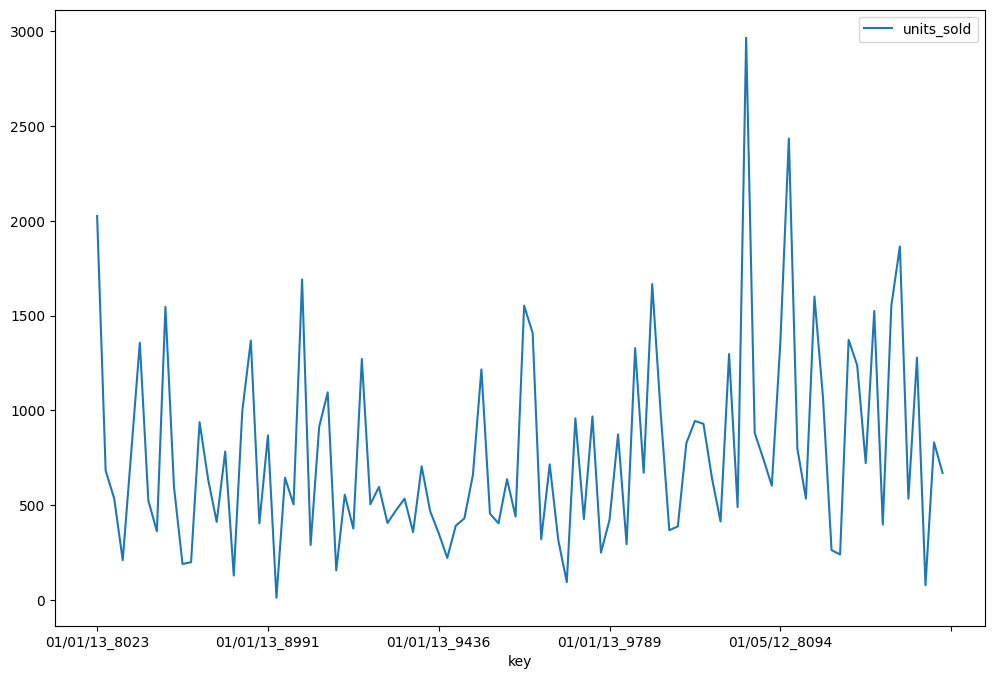

In [14]:
df[:100].plot(figsize=(12,8))

# Converting supervised dataset

```units_sold``` becomes target variable

```day_1```, ```day_2```, ```day_3```, ```day_4``` becomes input

We will train our model to predict sales based on previous 4 days.

In [15]:
df['day_1'] = df['units_sold'].shift(-1)
df['day_2'] = df['units_sold'].shift(-2)
df['day_3'] = df['units_sold'].shift(-3)
df['day_4'] = df['units_sold'].shift(-4)

In [16]:
df

,units_sold,day_1,day_2,day_3,day_4
key,,,,,
01/01/13_8023,2025,682.0,535.0,210.0,782.0
01/01/13_8058,682,535.0,210.0,782.0,1357.0
01/01/13_8063,535,210.0,782.0,1357.0,524.0
01/01/13_8091,210,782.0,1357.0,524.0,362.0
01/01/13_8094,782,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...
31/10/11_9890,531,551.0,431.0,820.0,506.0
31/10/11_9909,551,431.0,820.0,506.0,NaN
31/10/11_9954,431,820.0,506.0,NaN,NaN


Remove NA data

In [17]:
df = df.dropna()

<Axes: xlabel='key'>

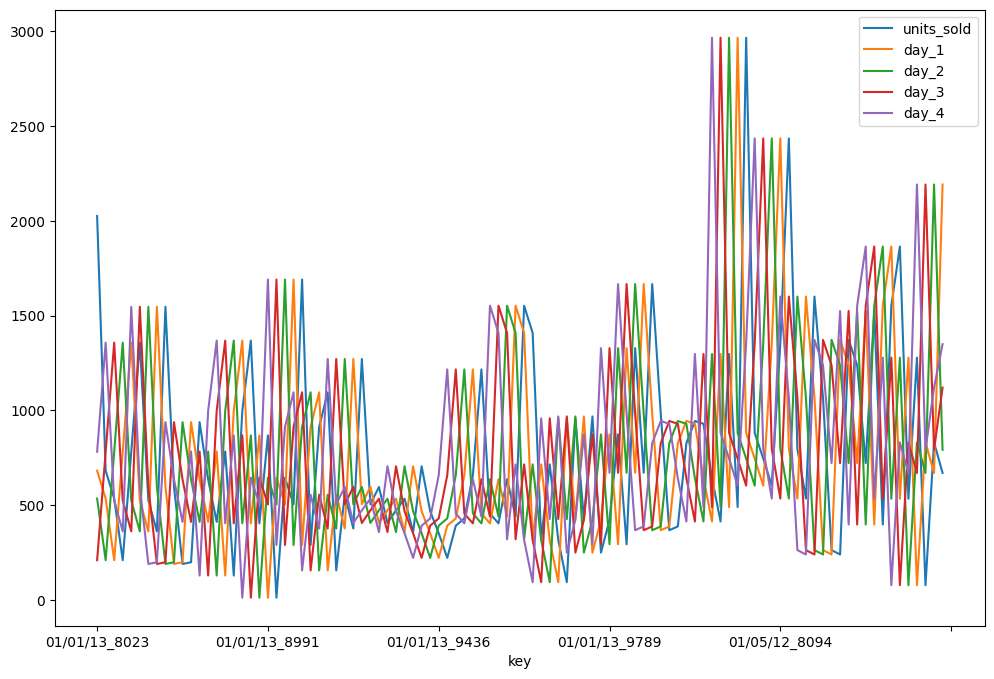

In [18]:
df[:100].plot(figsize=(12,8))

# Train-Test Split

In [19]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8395, 4)
(1481, 4)
(8395, 1)
(1481, 1)


# Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

C:\Users\Vivek Kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
y_pred

array([567.56, 881.56, 500.06, ..., 898.93, 690.39, 536.74])

In [23]:
y_test

array([[680],
       [616],
       [501],
       ...,
       [698],
       [908],
       [531]], dtype=int64)

In [25]:
from sklearn.metrics import r2_score


# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: 0.6803499434850158


In [24]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : 0.6803499434850158


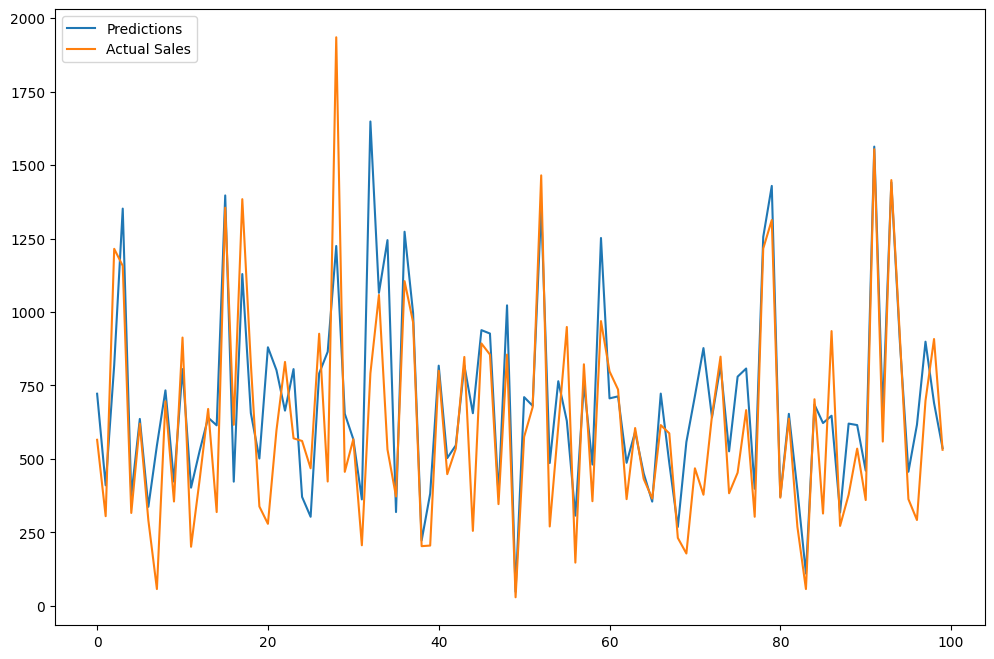

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# XGBoost Regression

In [27]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [28]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : 0.5962779521942139


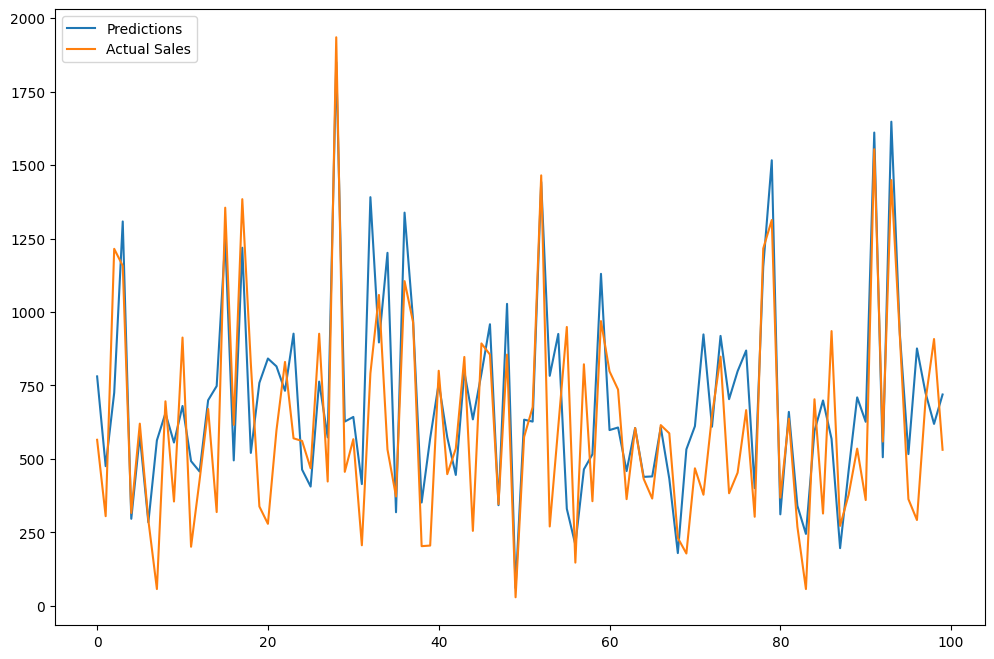

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# Hyperparameter Tuning for Random Forest

using optuna

In [32]:
x.shape

(9876, 4)

In [40]:
y_train.shape

(8395, 1)

In [35]:
y = y.ravel()

In [36]:
y.shape

(9876,)

In [41]:
import optuna
def objective(trial):
    # Suggest hyperparameters
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 50, 300),
    'max_depth': trial.suggest_int('max_depth', 3, 50),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_features': trial.suggest_categorical('max_features', [ 'sqrt', 'log2']),
    'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    'random_state': 42
    }


    rf_regressor = RandomForestRegressor(**params)
    rf_regressor.fit(X_train, y_train.ravel())
    return rf_regressor.score(X_test, y_test.ravel())
    

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best trial:")
print(study.best_trial.params)


[I 2025-07-10 01:20:54,852] A new study created in memory with name: no-name-fb8c296d-b08b-4798-990e-21e6676f1ccd
[I 2025-07-10 01:21:00,749] Trial 0 finished with value: 0.6851391265403298 and parameters: {'n_estimators': 152, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.6851391265403298.
[I 2025-07-10 01:21:02,482] Trial 1 finished with value: 0.6441717610713988 and parameters: {'n_estimators': 96, 'max_depth': 38, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6851391265403298.
[I 2025-07-10 01:21:03,966] Trial 2 finished with value: 0.6236177559255234 and parameters: {'n_estimators': 88, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6851391265403298.
[I 2025-07-10 01:21:06,242] Trial 3 finished with value: 0.6260322073204518 a

Best trial:
{'n_estimators': 208, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}


In [42]:
study.best_trial.params

{'n_estimators': 208,
 'max_depth': 29,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'bootstrap': False}

In [43]:
rf_regressor = RandomForestRegressor(**study.best_trial.params)
rf_regressor.fit(X_train, y_train)

C:\Users\Vivek Kumar\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(bootstrap=False, max_depth=29, max_features='log2',
                      n_estimators=208)

In [44]:
y_pred = rf_regressor.predict(X_test)

In [45]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - rf_regressor.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

R Sq. Score for Random Forest Regression : 0.6812337261275512
Adj. R Sq. Score for Random Forest Regression : 0.6803698608867044


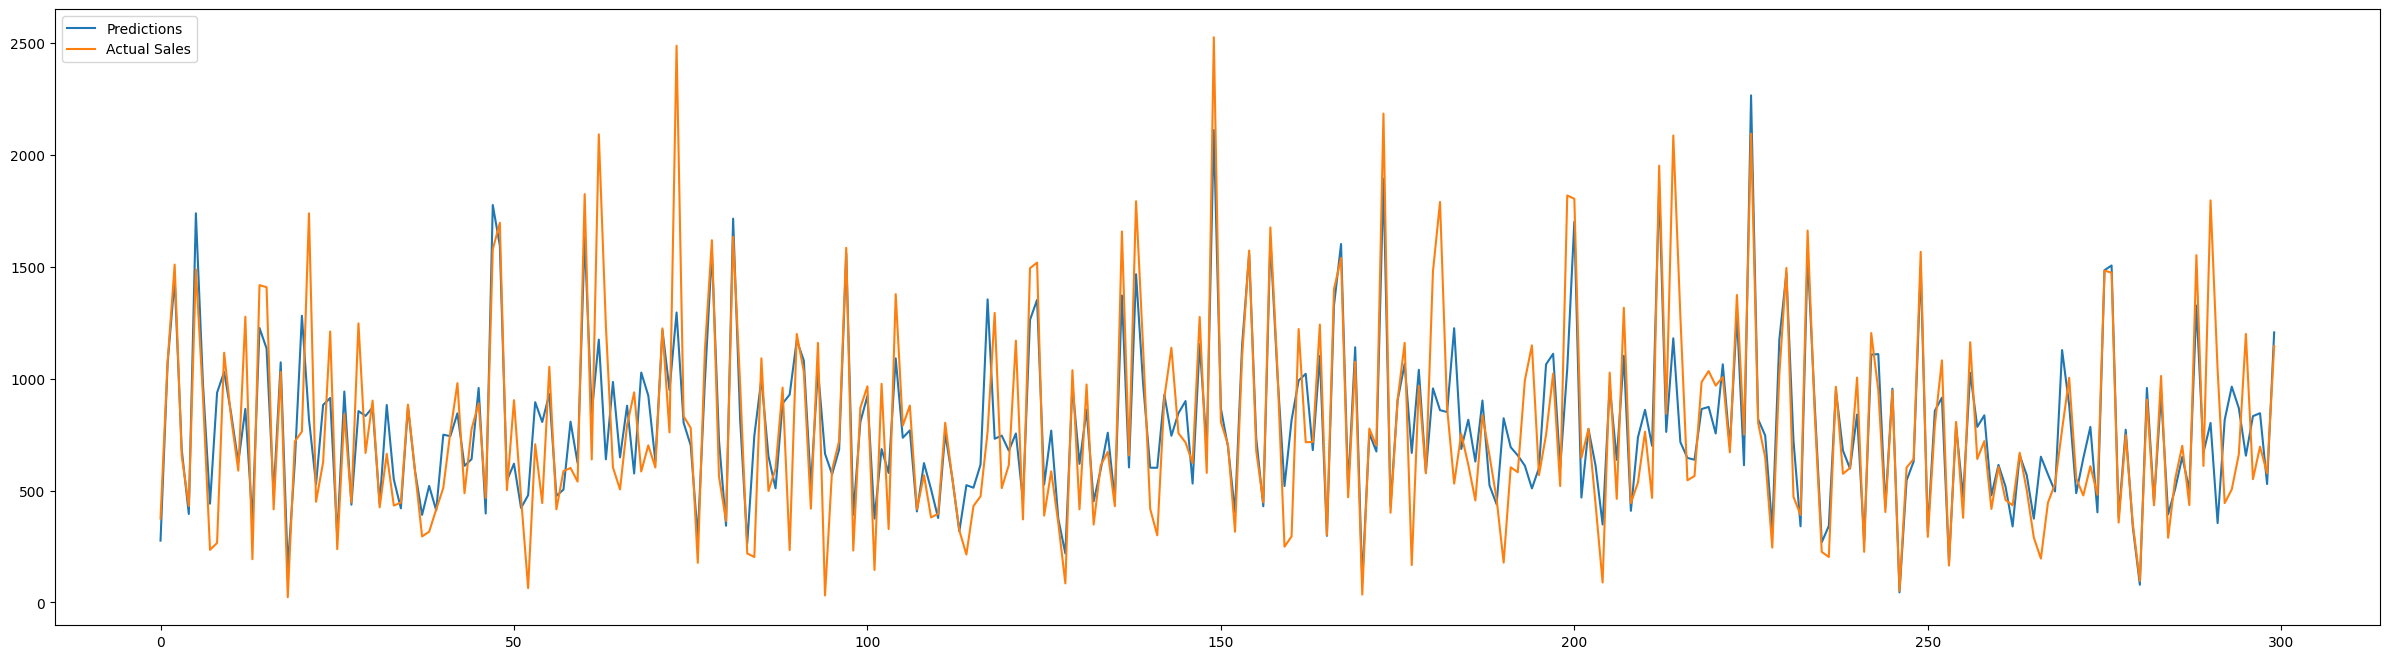

In [46]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()